In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Project/data_k_mean.txt'


TASK 01


In [4]:
df = pd.read_csv(path, sep=" " , dtype = 'float32', names=['x1', 'x2'], header = None)
df

,x1,x2
0,-7.87157,-4.86573
1,-4.76661,-6.87944
2,-6.67986,-5.83080
3,-8.93021,-4.15571
4,-7.91375,-4.22840
...,...,...
2995,-8.06037,-4.84080
2996,7.47328,0.37321
2997,6.91832,-0.32132
2998,-8.23828,-4.00405


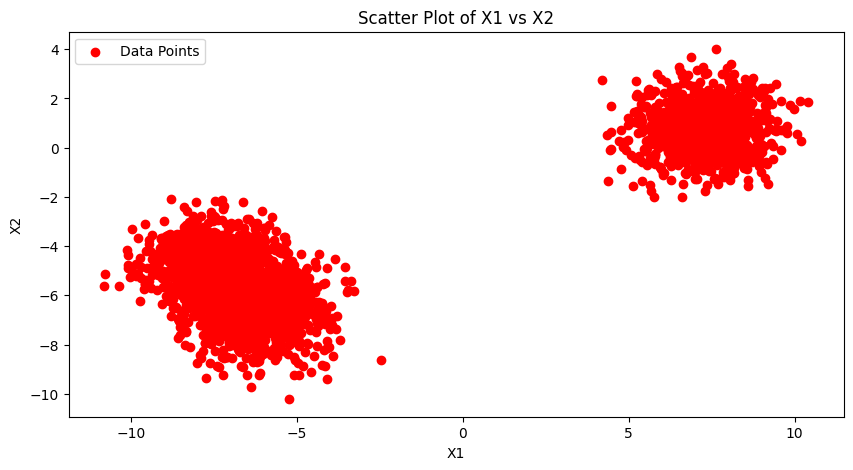

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df['x1'], y=df['x2'], c='red', label='Data Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X1 vs X2')
plt.legend()
plt.show()

TASK 02


In [6]:
data = df.to_numpy()

# Parameters
num_clusters = 2
num_iterations = 10

# Initialize centroids randomly
np.random.seed(27)
initial_centroids_indices = np.random.choice(data.shape[0], num_clusters, replace=False)
initial_centroids = data[initial_centroids_indices]



# K-Means clustering
for _ in range(num_iterations):
    distances = np.sqrt(np.sum((data[:, np.newaxis] - initial_centroids) ** 2, axis=2))
    labels = np.argmin(distances, axis=1)

    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(num_clusters)])

    if np.all(initial_centroids == new_centroids):
        break

    initial_centroids = new_centroids



TASK 03


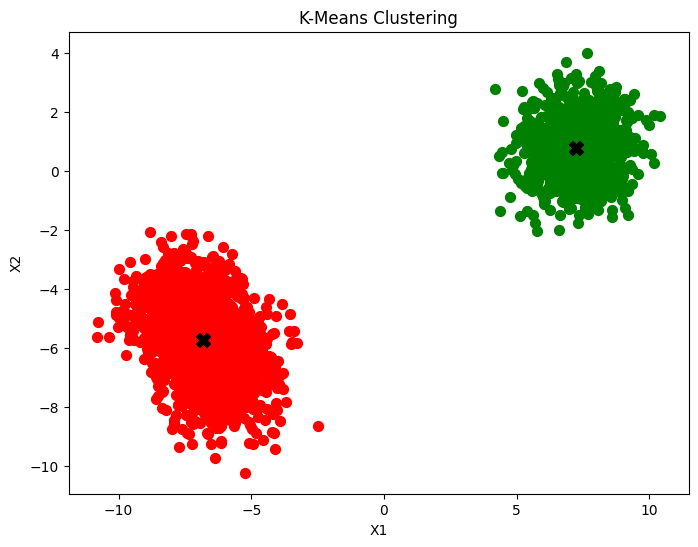

In [7]:
# Plot data points and clusters
colors = ['g', 'r']
plt.figure(figsize=(8, 6))
for i in range(len(data)):
    plt.scatter(data[i, 0], data[i, 1], c=colors[labels[i]], s=50)
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker='X', c='black', s=100)
plt.title("K-Means Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()